In [2]:
# Install a single library
!pip install numpy

Epoch 1/50
3/3 [==============================] - 5s 34ms/step - loss: 0.1310
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0645
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0219
Epoch 4/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 5/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0226
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0129
Epoch 7/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0106
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0132
Epoch 9/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 10/50
3/3 [==============================] - 0s 12ms/step - loss: 0.0103
Epoch 11/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 12/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0100
Epoch 13/50
3/3 [==============================] - 0s 11ms/ste

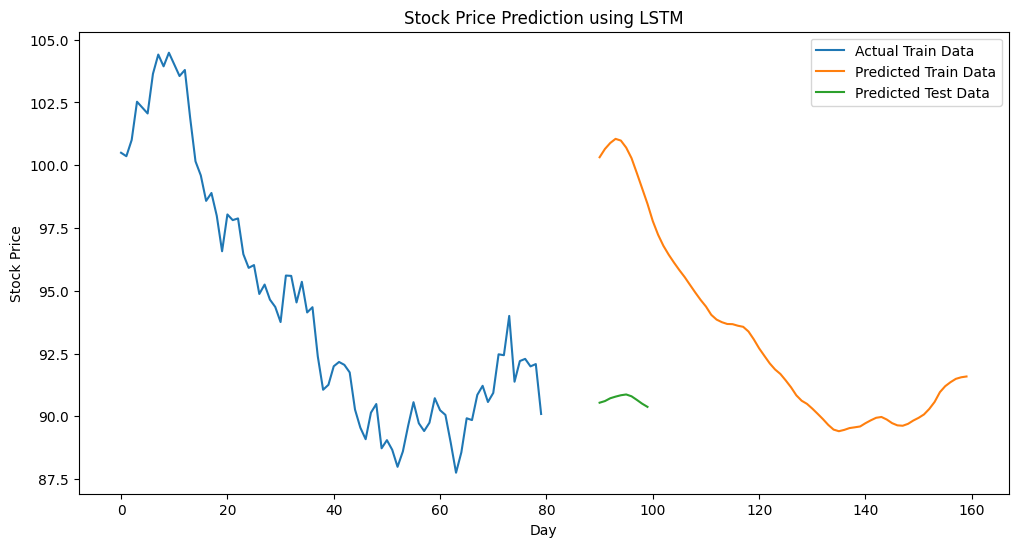

In [6]:
#problem statememt:(Bharat Intern Data Science Internship)
#Take stock price of any company you
#want and predicts its price by using LSTM.
#Use only Jupyter notebook code.


%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


data = pd.read_csv('sample_stock_data.csv')
prices = data['Close'].values
scaler = MinMaxScaler()
prices_normalized = scaler.fit_transform(prices.reshape(-1, 1))


sequence_length = 10
train_size = int(len(prices) * 0.8)


train_data = prices[:train_size]
test_data = prices[train_size:]


train_data_normalized = scaler.fit_transform(train_data.reshape(-1, 1))
test_data_normalized = scaler.transform(test_data.reshape(-1, 1))


train_sequences = []
test_sequences = []
for i in range(len(train_data_normalized) - sequence_length):
    train_sequences.append(train_data_normalized[i:i+sequence_length+1])
for i in range(len(test_data_normalized) - sequence_length):
    test_sequences.append(test_data_normalized[i:i+sequence_length+1])

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

X_train = train_sequences[:, :-1]
y_train = train_sequences[:, -1]
X_test = test_sequences[:, :-1]
y_test = test_sequences[:, -1]


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32)


train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


train_rmse = np.sqrt(mean_squared_error(train_data[sequence_length:sequence_length+train_size], train_predictions))
test_rmse = np.sqrt(mean_squared_error(test_data[sequence_length:], test_predictions))


print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Actual Train Data')
plt.plot(range(sequence_length+train_size, sequence_length+train_size+len(train_predictions)), train_predictions, label='Predicted Train Data')
plt.plot(range(sequence_length+train_size, len(prices)), test_predictions, label='Predicted Test Data')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()

